## Dreaddit: A Reddit Dataset for Stress Analysis in Social Media by Elsbeth Turcan, Kathleen McKeown

Sofia Budman     314059155  
Ilana feldman    304257553									



# **get data**

In [3]:
! git clone https://github.com/elana1fel/Dreaddit_implementation.git

Cloning into 'Dreaddit_implementation'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [4]:
import os
os.chdir("/content/Dreaddit_implementation")
main_path = os.getcwd()
main_path


'/content/Dreaddit_implementation'

In [5]:
import pandas as pd
import numpy as np

train = pd.read_csv("dreaddit-train.csv")
test = pd.read_csv("dreaddit-test.csv")


In [6]:
train.head(5)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [7]:
train.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [8]:
train['label'].value_counts(),test['label'].value_counts()

(1    1488
 0    1350
 Name: label, dtype: int64, 1    369
 0    346
 Name: label, dtype: int64)

# **Distribution of Subreddits in Train**

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns 
try:
  import plotly.express as px
except:
  ! pip install --upgrade plotly
  !pip install pyyaml==5.4.1


In [10]:
values = train['subreddit'].value_counts()
labels = train['subreddit'].value_counts().index

fig = px.pie(train, names=labels, values=values)
fig.update_layout(title='Distribution of Subreddits', template='plotly_dark')
fig.update_traces(hovertemplate='%{label}: %{value}')
fig.show()

In [11]:
train

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722


In [12]:
def add_domain(df):
    df['domain'] = df['subreddit'].map(
        {
        'domesticviolence':'abuse',
        'survivorsofabuse':'abuse',
        'anxiety':'anxiety',
        'stress':'anxiety',
        'almosthomeless':'financial',
        'assistance':'financial',
        'food_pantry':'financial',
        'homeless':'financial',
        'ptsd':'ptsd',
        'relationships':'social',
        }
    )
    return df

In [13]:
train.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [14]:
#train = add_domain(train)
#test = add_domain(test)

In [15]:
train.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

# **Wrodcloud based on Label**

In [16]:
from wordcloud import WordCloud, STOPWORDS

In [17]:
stopwords = set(STOPWORDS)

In [18]:
label_1_para = str.lower(''.join(train[train['label'] == 1]['text']))

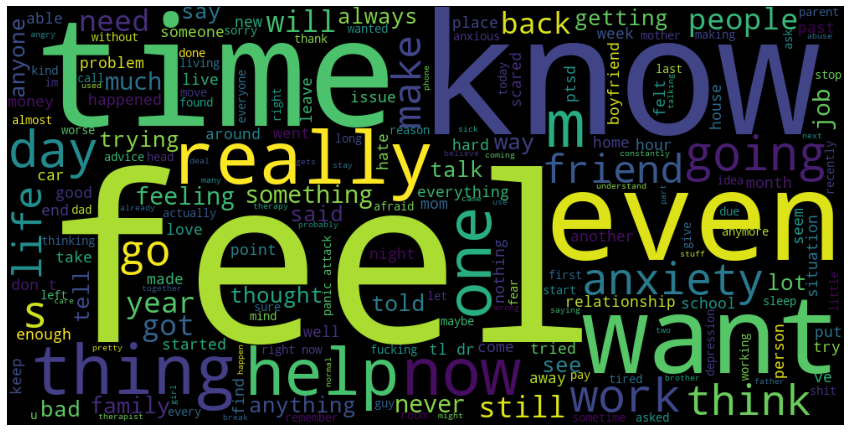

In [19]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(label_1_para)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
label_0_para = str.lower(''.join(train[train['label'] == 0]['text']))

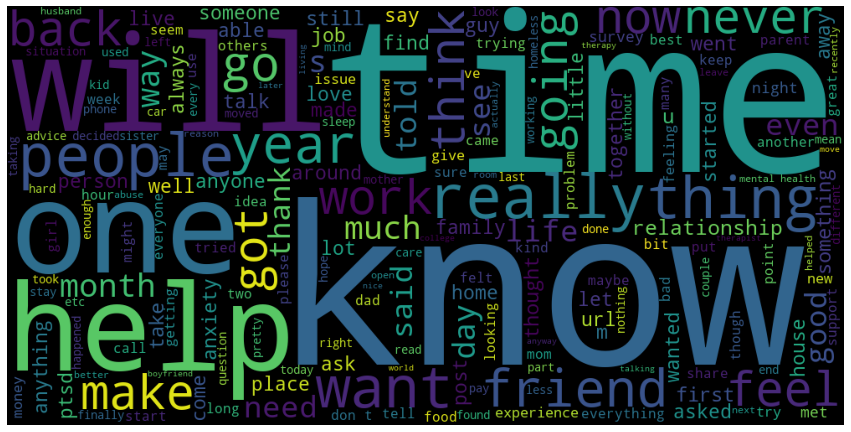

In [21]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(label_0_para)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [22]:
print(train.columns)

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)


In [23]:
train.corr().abs()['label'].sort_values(ascending = False)[:50]

label                       1.000000
lex_liwc_Tone               0.436005
lex_liwc_Clout              0.403804
lex_liwc_i                  0.400440
lex_liwc_negemo             0.387979
sentiment                   0.305157
lex_dal_min_pleasantness    0.297439
lex_liwc_Authentic          0.275282
lex_liwc_posemo             0.270672
lex_liwc_anx                0.260146
lex_liwc_social             0.250052
lex_liwc_Analytic           0.247933
lex_liwc_Dic                0.241536
lex_liwc_function           0.236932
lex_liwc_anger              0.218990
lex_liwc_you                0.210543
lex_liwc_feel               0.198048
lex_liwc_sad                0.196268
lex_liwc_Apostro            0.187498
lex_liwc_ppron              0.187372
lex_liwc_focuspresent       0.186910
lex_liwc_negate             0.186769
lex_liwc_pronoun            0.185846
lex_liwc_risk               0.178752
lex_liwc_affiliation        0.177702
lex_liwc_adverb             0.176623
lex_liwc_article            0.168128
l

In [24]:
!pip install transformers
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.2 MB/s 
     |████████████████████████████████| 120 kB 83.3 MB/s 
     |████████████████████████████████| 6.6 MB 90.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.7 MB/s 
     |████████████████████████████████| 1.3 MB 24.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=b99cf634e718fb7cd88d30ba311745f7b4f52dd5aeae3ce5dc116ed81b779b86
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [25]:
import tensorflow as tf
import transformers
import tqdm
from keras.preprocessing import sequence

#creating a function
def func_tokenizer(tokenizer_name, docs):
    features = []
    for doc in tqdm.tqdm(docs, desc = 'converting documents to features'):
        tokens = tokenizer_name.tokenize(doc)
        ids = tokenizer_name.convert_tokens_to_ids(tokens)
        features.append(ids)
    return features
print("The function is created successfully")

The function is created successfully


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['subreddit_new'] = le.fit_transform(train['subreddit'])
train.head(10)
test['subreddit_new'] = le.fit_transform(test['subreddit'])
test.head(10)

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,subreddit_new
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000,7
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909,1
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818,6
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667,6
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667,7
5,850,assistance,7py440,"[10, 15]",Thanks. Edit 1 - Fuel Receipt As Requested. <u...,0,1.0,1.515778e+09,7,0.910714,...,1.0000,1.0,1.70441,1.56364,1.76971,0.70,16,3.289524,-0.275000,2
6,1643,homeless,9e8zyg,"[10, 15]","When moving into their tiny house, they would ...",0,0.0,1.536453e+09,14,15.815576,...,1.0000,1.0,1.59863,1.41860,1.82149,0.82,15,13.097570,0.000000,5
7,39090,anxiety,71ma4y,"(0, 5)","More specifically, for example, I live with ro...",1,0.8,1.506028e+09,6,10.029951,...,1.1429,1.0,1.70439,1.50598,1.82334,0.88,6,9.593832,0.039977,1
8,19468,almosthomeless,6d5p34,"(0, 5)",Long story short my family in NE Ohio is abusi...,1,1.0,1.495666e+09,21,1.068692,...,1.0000,1.0,1.69207,1.62817,1.88011,0.81,30,3.251153,0.082407,0
9,48595,domesticviolence,83d7jt,"(5, 10)","This new ""roommate"" lived 3 hours away in an p...",0,0.6,1.520659e+09,7,5.789629,...,1.0000,1.0,1.70685,1.73571,1.88339,1.00,7,5.975440,0.258965,3


In [27]:
#df = pd.concat([train, test],axis=0, ignore_index=True)
df_train = train.sample(frac = 1).reset_index(drop = True)
df_test = test.sample(frac = 1).reset_index(drop = True)


# **Utils functions**

In [28]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [29]:
summ_results=[]
y_pred_summ = []

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# evaluate a given model using cross-validation
def evaluate_model(y_test, y_pred):
	results = classification_report(y_pred, y_test, output_dict=True)
	conf_mat = confusion_matrix(y_test, y_pred)
	scores = { 'precision':results['weighted avg']['precision'],\
             'recall':results['weighted avg']['recall'],\
             'f1_score':results['weighted avg']['f1-score'],\
             'confusion_matrix': conf_mat}

	return scores


In [31]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
def get_models(models_to_drop=None):
    models = dict()
    models['lr'] = make_pipeline(StandardScaler(), LogisticRegression(solver = 'saga', C = 70.0))
    models['knn'] = make_pipeline(StandardScaler(), KNeighborsClassifier())
    models['DecisionTree'] = DecisionTreeClassifier(max_depth = 1)
    models['svm'] = make_pipeline(StandardScaler(), SVC())
    models['bayes'] = make_pipeline(StandardScaler(), GaussianNB())
    models['xgboost'] = XGBClassifier(n_estimators = 11, max_depth = 1)
    models['GBM'] = GradientBoostingClassifier(n_estimators = 10)
    models['rf'] = RandomForestClassifier(n_estimators = 10)
    models['adaboost'] = AdaBoostClassifier(n_estimators= 12)

    if models_to_drop is not None:
      for model in models_to_drop:
        del models[model]
    return models

In [32]:
def create_res(scores, name, method):
  if method is None:
    method_name = name
  else:
    method_name = method + '_' + name
  res = {'name':method_name,\
         'precision':scores['precision'],\
         'recall':scores['recall'],\
         'f1':scores['f1_score'],\
         'confusion_matrix': scores['confusion_matrix']}
  return res

In [33]:
def get_eval():
	# get the models to evaluate
	models = get_models()
	# evaluate the models and store results
	results, names = list(), list()
	for name, model in models.items():
		model.fit(x_train, y_train)
		y_pred = model.predict(x_test)
		scores = evaluate_model(y_test, y_pred)
		results.append(scores)
		names.append(name)

		print(f"{name} : precision: {scores['precision']:.2f}, recall: {scores['recall']:.2f}, f1_score: {scores['f1_score']:.2f}")
		print(f" confusion_matrix: \n {scores['confusion_matrix']}")
		res = create_res(scores, name, method)
		summ_results.append(res)
		y_pred_summ.append({'name': res['name'], 'y_pred': y_pred})


In [34]:
from sklearn.ensemble import VotingClassifier
from joblib import parallel_backend

def get_majority_vote():
  models_dict = get_models()
  models = []
  for key in models_dict.keys():
    models.append((key, models_dict[key]))

  majority = VotingClassifier(estimators=models,
                              n_jobs=-1,
                              voting='hard',
                              verbose=True)
  with parallel_backend('threading', n_jobs=6):
      majority.fit(x_train, y_train)
  majority_pred = majority.predict(x_test)

  from sklearn.metrics import confusion_matrix, classification_report
  majority_res = classification_report(y_test, majority_pred, output_dict=True)
  confusion_res = confusion_matrix(y_test, majority_pred)
  scores = { 'precision':majority_res['weighted avg']['precision'],\
             'recall':majority_res['weighted avg']['recall'],\
             'f1_score':majority_res['weighted avg']['f1-score'],\
             'confusion_matrix': confusion_res}
  print(majority_res)
  summ_results.append(create_res(scores, 'majority vote', method))

In [35]:
def get_majority_vote_correlated(y_pred_df):
  corr = y_pred_df.corr().abs()

  # Select upper triangle of correlation matrix
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

  # Find index of feature columns with correlation greater than 0.8
  to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
  print(f"droping: {to_drop}")
  if len(to_drop)<1:
      to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
      if len(to_drop)<1:
        return
      print(f"droping: {to_drop}")

  models_dict = get_models(to_drop)
  models = []
  for key in models_dict.keys():
    models.append((key, models_dict[key]))

  majority = VotingClassifier(estimators=models,
                              n_jobs=-1,
                              voting='hard',
                              verbose=True)
  with parallel_backend('threading', n_jobs=6):
      majority.fit(x_train, y_train)
  majority_pred = majority.predict(x_test)

  from sklearn.metrics import confusion_matrix, classification_report
  majority_res = classification_report(y_test, majority_pred, output_dict=True)
  confusion_res = confusion_matrix(y_test, majority_pred)
  scores = { 'precision':majority_res['weighted avg']['precision'],\
             'recall':majority_res['weighted avg']['recall'],\
             'f1_score':majority_res['weighted avg']['f1-score'],\
             'confusion_matrix': confusion_res}

  print(majority_res)
  summ_results.append(create_res(scores, 'majority vote with corr', method))


# **Prepare data**

In [36]:
y_train = df_train['label']
y_test = df_test['label']
X_train_orig = df_train.drop(['post_id', 'sentence_range', 'id'], axis = 1)
X_test_orig = df_test.drop(['post_id', 'sentence_range', 'id'], axis = 1)


In [37]:
X_train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 114 entries, subreddit to subreddit_new
dtypes: float64(106), int64(6), object(2)
memory usage: 2.5+ MB


In [38]:
N = 114
# Select first N columns
X1_train = X_train_orig.iloc[: , 3:N]
X1_test = X_test_orig.iloc[: , 3:N]
X1_train

,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,...,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,subreddit_new
0,0.857143,1539721114,30,4.821250,78,35.66,3.66,99.00,73.64,15.60,...,1.1250,1.0,1.76514,1.47692,1.84464,1.00,17,5.990000,0.058712,6
1,1.000000,1527317147,2,8.722162,106,3.33,14.96,88.81,1.00,21.20,...,1.1250,1.0,1.69853,1.41373,1.89127,1.00,0,7.738270,-0.215278,6
2,1.000000,1505798705,2,3.623636,63,62.94,17.04,96.31,1.00,12.60,...,1.2222,1.0,1.83192,1.55926,1.80539,0.76,1,4.075758,-0.079167,1
3,0.833333,1496832582,1,7.121321,101,30.29,42.15,6.45,43.84,20.20,...,1.1429,1.0,1.76331,1.47609,1.95425,0.67,10,6.704415,0.022222,1
4,1.000000,1515190153,1,4.671724,56,20.29,81.40,20.57,97.85,11.20,...,1.1818,1.0,1.69766,1.54400,2.03706,0.60,3,6.023655,0.402857,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,0.600000,1509665602,7,3.616034,56,13.85,10.58,98.37,59.59,11.20,...,1.1250,1.0,1.74226,1.40000,1.91510,0.70,7,5.820207,0.180952,2
2834,0.800000,1513329650,8,6.699130,71,19.79,55.59,60.11,52.17,11.83,...,1.0000,1.0,1.71939,1.52381,1.95744,0.90,3,5.867362,0.135714,6
2835,0.833333,1507095084,8,4.801748,129,19.46,10.76,81.40,1.00,25.80,...,1.1250,1.0,1.73830,1.57241,1.84282,1.00,11,5.532848,-0.163740,3
2836,0.800000,1538995772,6,5.330109,90,41.99,25.24,36.24,25.77,18.00,...,1.0000,1.0,1.69025,1.77317,1.87253,1.00,4,5.822957,-0.017857,3


# VADER feature

In [39]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [40]:
def get_vader_feature(data):
  x_vader = pd.DataFrame()
  x_vader['neg'] = data['text'].apply(lambda review: sid.polarity_scores(review)['neg'])
  x_vader['pos'] = data['text'].apply(lambda review: sid.polarity_scores(review)['pos'])
  x_vader['neu'] = data['text'].apply(lambda review: sid.polarity_scores(review)['neu'])
  x_vader['compound'] = data['text'].apply(lambda review: sid.polarity_scores(review)['compound'])
  return x_vader


In [41]:
x_train_vader = get_vader_feature(X_train_orig)
x_test_vader = get_vader_feature(X_test_orig)

# **Without embedding**

In [42]:
method = 'without_embeddings'

In [43]:
x_train = X1_train
x_test = X1_test
get_eval()

lr : precision: 0.75, recall: 0.75, f1_score: 0.75
 confusion_matrix: 
 [[245 101]
 [ 77 292]]
knn : precision: 0.72, recall: 0.70, f1_score: 0.70
 confusion_matrix: 
 [[208 138]
 [ 76 293]]
DecisionTree : precision: 0.76, recall: 0.73, f1_score: 0.74
 confusion_matrix: 
 [[207 139]
 [ 54 315]]
svm : precision: 0.77, recall: 0.77, f1_score: 0.77
 confusion_matrix: 
 [[250  96]
 [ 71 298]]
bayes : precision: 0.75, recall: 0.71, f1_score: 0.71
 confusion_matrix: 
 [[194 152]
 [ 57 312]]
xgboost : precision: 0.75, recall: 0.74, f1_score: 0.74
 confusion_matrix: 
 [[228 118]
 [ 69 300]]
GBM : precision: 0.77, recall: 0.73, f1_score: 0.74
 confusion_matrix: 
 [[203 143]
 [ 47 322]]
rf : precision: 0.70, recall: 0.70, f1_score: 0.70
 confusion_matrix: 
 [[248  98]
 [115 254]]
adaboost : precision: 0.72, recall: 0.69, f1_score: 0.70
 confusion_matrix: 
 [[198 148]
 [ 71 298]]


## **Majority baseline** 

In [44]:
get_majority_vote()

[Voting] ...................... (2 of 9) Processing knn, total=   0.0s
[Voting] ............. (3 of 9) Processing DecisionTree, total=   0.0s
[Voting] .................... (5 of 9) Processing bayes, total=   0.0s
[Voting] .................. (6 of 9) Processing xgboost, total=   0.2s
[Voting] ....................... (8 of 9) Processing rf, total=   0.3s
[Voting] ...................... (7 of 9) Processing GBM, total=   0.9s
[Voting] ....................... (1 of 9) Processing lr, total=   0.9s
[Voting] ................. (9 of 9) Processing adaboost, total=   0.5s
[Voting] ...................... (4 of 9) Processing svm, total=   1.1s
{'0': {'precision': 0.8181818181818182, 'recall': 0.6763005780346821, 'f1-score': 0.740506329113924, 'support': 346}, '1': {'precision': 0.7389277389277389, 'recall': 0.8590785907859079, 'f1-score': 0.794486215538847, 'support': 369}, 'accuracy': 0.7706293706293706, 'macro avg': {'precision': 0.7785547785547786, 'recall': 0.767689584410295, 'f1-score': 0.7674

## **Majority baseline with correlation check** 

In [45]:
def get_res_for_corr():
  results_for_corr = [{i['name'].split(method + '_')[1]: i['y_pred']} for i in y_pred_summ if method in i['name']]
  results_for_corr = dict((key, val) for k in results_for_corr for key, val in k.items())
  results_for_corr_df = pd.DataFrame.from_dict(results_for_corr)
  return results_for_corr_df

In [46]:
results_for_corr_df = get_res_for_corr()

get_majority_vote_correlated(results_for_corr_df)

droping: ['svm']
[Voting] ...................... (2 of 8) Processing knn, total=   0.0s
[Voting] ............. (3 of 8) Processing DecisionTree, total=   0.0s
[Voting] .................... (4 of 8) Processing bayes, total=   0.0s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[Voting] .................. (5 of 8) Processing xgboost, total=   0.2s
[Voting] ....................... (7 of 8) Processing rf, total=   0.2s
[Voting] ................. (8 of 8) Processing adaboost, total=   0.4s
[Voting] ....................... (1 of 8) Processing lr, total=   0.7s
[Voting] ...................... (6 of 8) Processing GBM, total=   0.7s
{'0': {'precision': 0.7940199335548173, 'recall': 0.6907514450867052, 'f1-score': 0.7387944358578052, 'support': 346}, '1': {'precision': 0.7415458937198067, 'recall': 0.8319783197831978, 'f1-score': 0.7841634738186462, 'support': 369}, 'accuracy': 0.7636363636363637, 'macro avg': {'precision': 0.767782913637312, 'recall': 0.7613648824349515, 'f1-score': 0.7614789548382257, 'support': 715}, 'weighted avg': {'precision': 0.7669389255840217, 'recall': 0.7636363636363637, 'f1-score': 0.7622086666375959, 'support': 715}}


## with vader feature

In [47]:
method = 'without_embeddings_with_vader'
x_train = pd.concat([x_train, x_train_vader], axis=1)
x_test = pd.concat([x_test, x_test_vader], axis=1)

In [48]:
x_test_vader

,neg,pos,neu,compound
0,0.000,0.211,0.789,0.9646
1,0.000,0.334,0.666,0.9789
2,0.141,0.100,0.759,-0.4737
3,0.043,0.000,0.957,-0.6682
4,0.099,0.000,0.901,-0.7650
...,...,...,...,...
710,0.103,0.267,0.629,0.9186
711,0.236,0.096,0.668,-0.9233
712,0.090,0.154,0.756,0.8641
713,0.269,0.091,0.641,-0.9658


In [49]:
get_eval()

lr : precision: 0.75, recall: 0.75, f1_score: 0.75
 confusion_matrix: 
 [[246 100]
 [ 82 287]]
knn : precision: 0.75, recall: 0.72, f1_score: 0.73
 confusion_matrix: 
 [[208 138]
 [ 60 309]]
DecisionTree : precision: 0.76, recall: 0.73, f1_score: 0.74
 confusion_matrix: 
 [[207 139]
 [ 54 315]]
svm : precision: 0.76, recall: 0.76, f1_score: 0.76
 confusion_matrix: 
 [[247  99]
 [ 72 297]]
bayes : precision: 0.74, recall: 0.71, f1_score: 0.72
 confusion_matrix: 
 [[200 146]
 [ 60 309]]
xgboost : precision: 0.76, recall: 0.74, f1_score: 0.75
 confusion_matrix: 
 [[223 123]
 [ 60 309]]
GBM : precision: 0.77, recall: 0.74, f1_score: 0.75
 confusion_matrix: 
 [[213 133]
 [ 51 318]]
rf : precision: 0.71, recall: 0.71, f1_score: 0.71
 confusion_matrix: 
 [[245 101]
 [104 265]]
adaboost : precision: 0.74, recall: 0.71, f1_score: 0.72
 confusion_matrix: 
 [[198 148]
 [ 59 310]]


In [50]:
get_majority_vote()

[Voting] ............. (3 of 9) Processing DecisionTree, total=   0.0s
[Voting] ...................... (2 of 9) Processing knn, total=   0.1s
[Voting] .................... (5 of 9) Processing bayes, total=   0.1s
[Voting] .................. (6 of 9) Processing xgboost, total=   0.2s
[Voting] ....................... (8 of 9) Processing rf, total=   0.2s
[Voting] ....................... (1 of 9) Processing lr, total=   0.9s
[Voting] ................. (9 of 9) Processing adaboost, total=   0.4s
[Voting] ...................... (7 of 9) Processing GBM, total=   1.0s
[Voting] ...................... (4 of 9) Processing svm, total=   1.1s
{'0': {'precision': 0.8080808080808081, 'recall': 0.6936416184971098, 'f1-score': 0.7465007776049767, 'support': 346}, '1': {'precision': 0.7464114832535885, 'recall': 0.8455284552845529, 'f1-score': 0.7928843710292249, 'support': 369}, 'accuracy': 0.772027972027972, 'macro avg': {'precision': 0.7772461456671983, 'recall': 0.7695850368908314, 'f1-score': 0.76

In [51]:
results_for_corr_df = get_res_for_corr()
get_majority_vote_correlated(results_for_corr_df)

droping: ['svm', 'xgboost', 'GBM']
[Voting] ...................... (2 of 6) Processing knn, total=   0.0s
[Voting] ............. (3 of 6) Processing DecisionTree, total=   0.0s
[Voting] .................... (4 of 6) Processing bayes, total=   0.0s
[Voting] ....................... (5 of 6) Processing rf, total=   0.1s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[Voting] ................. (6 of 6) Processing adaboost, total=   0.3s
[Voting] ....................... (1 of 6) Processing lr, total=   0.5s
{'0': {'precision': 0.7834394904458599, 'recall': 0.7109826589595376, 'f1-score': 0.7454545454545456, 'support': 346}, '1': {'precision': 0.7506234413965087, 'recall': 0.8157181571815718, 'f1-score': 0.781818181818182, 'support': 369}, 'accuracy': 0.765034965034965, 'macro avg': {'precision': 0.7670314659211843, 'recall': 0.7633504080705547, 'f1-score': 0.7636363636363638, 'support': 715}, 'weighted avg': {'precision': 0.7665036553420689, 'recall': 0.765034965034965, 'f1-score': 0.7642212333121425, 'support': 715}}


In [52]:
results_witout_embedding = summ_results
summ_results = []

In [53]:
pd.DataFrame(results_witout_embedding)


,name,precision,recall,f1,confusion_matrix
0,without_embeddings_lr,0.753843,0.751049,0.751601,"[[245, 101], [77, 292]]"
1,without_embeddings_knn,0.717425,0.700699,0.703829,"[[208, 138], [76, 293]]"
2,without_embeddings_DecisionTree,0.760431,0.730070,0.735030,"[[207, 139], [54, 315]]"
3,without_embeddings_svm,0.769407,0.766434,0.766984,"[[250, 96], [71, 298]]"
4,without_embeddings_bayes,0.745537,0.707692,0.714281,"[[194, 152], [57, 312]]"
5,without_embeddings_xgboost,0.749019,0.738462,0.740285,"[[228, 118], [69, 300]]"
6,without_embeddings_GBM,0.772655,0.734266,0.740373,"[[203, 143], [47, 322]]"
7,without_embeddings_rf,0.702774,0.702098,0.702038,"[[248, 98], [115, 254]]"
8,without_embeddings_adaboost,0.719050,0.693706,0.698412,"[[198, 148], [71, 298]]"
9,without_embeddings_majority vote,0.777280,0.770629,0.768364,"[[234, 112], [52, 317]]"


# **Without embedding - summery results**

In [54]:
pd.DataFrame(results_witout_embedding)

,name,precision,recall,f1,confusion_matrix
0,without_embeddings_lr,0.753843,0.751049,0.751601,"[[245, 101], [77, 292]]"
1,without_embeddings_knn,0.717425,0.700699,0.703829,"[[208, 138], [76, 293]]"
2,without_embeddings_DecisionTree,0.760431,0.730070,0.735030,"[[207, 139], [54, 315]]"
3,without_embeddings_svm,0.769407,0.766434,0.766984,"[[250, 96], [71, 298]]"
4,without_embeddings_bayes,0.745537,0.707692,0.714281,"[[194, 152], [57, 312]]"
5,without_embeddings_xgboost,0.749019,0.738462,0.740285,"[[228, 118], [69, 300]]"
6,without_embeddings_GBM,0.772655,0.734266,0.740373,"[[203, 143], [47, 322]]"
7,without_embeddings_rf,0.702774,0.702098,0.702038,"[[248, 98], [115, 254]]"
8,without_embeddings_adaboost,0.719050,0.693706,0.698412,"[[198, 148], [71, 298]]"
9,without_embeddings_majority vote,0.777280,0.770629,0.768364,"[[234, 112], [52, 317]]"


# **BERT tokenizer - all-MiniLM-L6-v2**

In [55]:
X_test_orig.head()

,subreddit,text,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,...,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,subreddit_new
0,relationships,"About a year and a half ago, we reconnected at...",0,1.0,1.515117e+09,1,6.509362,94,95.45,97.81,...,1.0000,1.0,1.69476,1.57662,1.95144,1.00,3,6.680298,0.105833,7
1,relationships,The chapter we shared together may have ended ...,0,1.0,1.516945e+09,0,1.684655,57,21.43,70.08,...,1.0000,1.0,1.76961,1.46800,2.08443,0.43,3,3.309914,0.293750,7
2,food_pantry,Due to recent medical issues of mine (I was ho...,1,1.0,1.502429e+09,6,5.625000,89,32.22,54.48,...,1.1429,1.0,1.72641,1.68642,1.86926,0.80,8,6.901111,-0.096429,4
3,ptsd,I was raised by a narcissistic grandmother and...,0,1.0,1.511790e+09,2,7.849167,107,36.76,61.05,...,1.1429,1.0,1.70995,1.65918,1.92703,0.67,1,8.583704,0.042593,6
4,domesticviolence,"He got off of me, and went into the other room...",1,0.6,1.518384e+09,11,1.180435,68,87.47,50.00,...,1.1429,1.0,1.77483,1.69667,1.81370,0.93,25,2.747174,-0.213611,3


In [56]:
def run_bert(bert_tokenizer):
  x_train = bert_tokenizer.encode(X_train_orig['text'])
  x_test = bert_tokenizer.encode(X_test_orig['text'])
  x_train = pd.DataFrame(x_train)
  x_test = pd.DataFrame(x_test)
  return x_train, x_test

In [57]:
method = 'bert_all-MiniLM-L6-v2'
from sentence_transformers import SentenceTransformer
bert_tokenizer = SentenceTransformer('all-MiniLM-L6-v2')
x_train, x_test = run_bert(bert_tokenizer)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [58]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.019217,-0.046006,0.134231,-0.052430,-0.008409,-0.057019,-0.051273,-0.078671,0.021115,-0.104789,...,0.016840,0.074037,-0.083497,0.056663,0.008725,-0.015989,-0.077770,0.089527,-0.133130,-0.032678
1,-0.053003,-0.013921,0.127510,0.025853,-0.042981,0.099757,-0.061447,0.023785,0.061996,-0.065336,...,-0.044008,0.015438,-0.062329,0.031304,-0.015815,-0.006165,0.109089,0.032424,-0.053211,-0.007893
2,0.006215,0.049481,-0.006705,-0.002140,-0.067597,0.033848,-0.001670,0.032852,-0.030268,-0.066157,...,-0.039094,-0.042123,0.034881,0.034181,-0.007533,0.060401,0.037396,-0.031250,-0.005396,-0.057051
3,-0.035487,0.043616,0.000287,0.094973,0.006897,-0.000706,-0.083431,0.007841,0.013597,-0.088223,...,0.030620,0.016324,-0.009664,0.020069,-0.046660,0.010454,0.106070,0.028022,0.034539,-0.015192
4,0.059817,0.054201,-0.003706,0.057194,0.123351,-0.003431,-0.034946,-0.014824,0.062560,-0.073980,...,0.062150,-0.122250,-0.064311,-0.057730,-0.019408,0.007059,0.001579,-0.016324,-0.058655,0.012805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,-0.021705,-0.001520,0.051840,0.020327,0.053251,0.025576,0.035631,-0.021236,-0.087658,-0.069539,...,-0.026264,0.068153,-0.011834,-0.014373,-0.097411,0.022914,0.103107,0.002447,0.044049,0.085336
711,0.036864,-0.103061,-0.007892,0.057868,-0.026781,0.031665,0.060855,-0.044956,0.024462,-0.131248,...,0.007860,0.081673,0.001182,0.109022,0.042873,0.038651,0.007124,0.075880,-0.056304,-0.011607
712,-0.088397,0.023325,0.073710,0.087847,-0.064858,0.055869,-0.066440,0.030916,0.002713,-0.035039,...,-0.040090,0.025940,0.065822,-0.040792,0.042257,0.091146,0.024358,-0.014110,0.007627,-0.003985
713,0.010558,0.136746,-0.052580,-0.020815,0.076777,-0.006966,-0.005552,-0.039665,0.022543,-0.030885,...,0.017528,-0.074303,-0.005104,-0.058811,-0.079122,0.018319,0.131019,-0.017961,0.024289,0.021470


In [59]:
get_eval()

lr : precision: 0.73, recall: 0.73, f1_score: 0.73
 confusion_matrix: 
 [[250  96]
 [ 94 275]]
knn : precision: 0.70, recall: 0.67, f1_score: 0.67
 confusion_matrix: 
 [[182 164]
 [ 75 294]]
DecisionTree : precision: 0.65, recall: 0.63, f1_score: 0.63
 confusion_matrix: 
 [[174 172]
 [ 94 275]]
svm : precision: 0.77, recall: 0.77, f1_score: 0.77
 confusion_matrix: 
 [[253  93]
 [ 74 295]]
bayes : precision: 0.72, recall: 0.72, f1_score: 0.72
 confusion_matrix: 
 [[249  97]
 [104 265]]
xgboost : precision: 0.68, recall: 0.67, f1_score: 0.67
 confusion_matrix: 
 [[205 141]
 [ 97 272]]
GBM : precision: 0.72, recall: 0.71, f1_score: 0.72
 confusion_matrix: 
 [[221 125]
 [ 80 289]]
rf : precision: 0.68, recall: 0.68, f1_score: 0.68
 confusion_matrix: 
 [[242 104]
 [123 246]]
adaboost : precision: 0.71, recall: 0.71, f1_score: 0.71
 confusion_matrix: 
 [[224 122]
 [ 87 282]]


In [60]:
get_majority_vote()

[Voting] ...................... (2 of 9) Processing knn, total=   0.0s
[Voting] .................... (5 of 9) Processing bayes, total=   0.0s
[Voting] ............. (3 of 9) Processing DecisionTree, total=   0.2s
[Voting] .................. (6 of 9) Processing xgboost, total=   0.6s
[Voting] ....................... (8 of 9) Processing rf, total=   0.6s
[Voting] ...................... (4 of 9) Processing svm, total=   1.5s
[Voting] ....................... (1 of 9) Processing lr, total=   2.1s
[Voting] ................. (9 of 9) Processing adaboost, total=   1.9s
[Voting] ...................... (7 of 9) Processing GBM, total=   3.7s
{'0': {'precision': 0.7660256410256411, 'recall': 0.6907514450867052, 'f1-score': 0.7264437689969604, 'support': 346}, '1': {'precision': 0.7344913151364765, 'recall': 0.8021680216802168, 'f1-score': 0.7668393782383419, 'support': 369}, 'accuracy': 0.7482517482517482, 'macro avg': {'precision': 0.7502584780810588, 'recall': 0.746459733383461, 'f1-score': 0.74

In [61]:
results_for_corr_df = get_res_for_corr()
method = method + '_correlated'

get_majority_vote_correlated(results_for_corr_df)

droping: []
droping: ['svm', 'bayes', 'xgboost', 'GBM', 'adaboost']
[Voting] ...................... (2 of 4) Processing knn, total=   0.0s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[Voting] ............. (3 of 4) Processing DecisionTree, total=   0.2s
[Voting] ....................... (4 of 4) Processing rf, total=   0.4s
[Voting] ....................... (1 of 4) Processing lr, total=   1.3s
{'0': {'precision': 0.7082228116710876, 'recall': 0.7716763005780347, 'f1-score': 0.7385892116182573, 'support': 346}, '1': {'precision': 0.7662721893491125, 'recall': 0.7018970189701897, 'f1-score': 0.7326732673267327, 'support': 369}, 'accuracy': 0.7356643356643356, 'macro avg': {'precision': 0.7372475005101, 'recall': 0.7367866597741122, 'f1-score': 0.735631239472495, 'support': 715}, 'weighted avg': {'precision': 0.7381811618293969, 'recall': 0.7356643356643356, 'f1-score': 0.7355360879209529, 'support': 715}}


## **BERT tokenizer with features**

In [62]:
method = 'bert_all-MiniLM-L6-v2_with_features'
x_test = pd.concat([x_test, X1_test], axis=1)
x_train = pd.concat([x_train, X1_train], axis=1)

In [63]:
get_eval()

lr : precision: 0.74, recall: 0.74, f1_score: 0.74
 confusion_matrix: 
 [[252  94]
 [ 89 280]]
knn : precision: 0.73, recall: 0.69, f1_score: 0.70
 confusion_matrix: 
 [[185 161]
 [ 60 309]]
DecisionTree : precision: 0.76, recall: 0.73, f1_score: 0.74
 confusion_matrix: 
 [[207 139]
 [ 54 315]]
svm : precision: 0.78, recall: 0.78, f1_score: 0.78
 confusion_matrix: 
 [[262  84]
 [ 73 296]]
bayes : precision: 0.75, recall: 0.74, f1_score: 0.74
 confusion_matrix: 
 [[239 107]
 [ 76 293]]
xgboost : precision: 0.75, recall: 0.74, f1_score: 0.74
 confusion_matrix: 
 [[228 118]
 [ 69 300]]
GBM : precision: 0.76, recall: 0.74, f1_score: 0.74
 confusion_matrix: 
 [[219 127]
 [ 59 310]]
rf : precision: 0.71, recall: 0.71, f1_score: 0.71
 confusion_matrix: 
 [[248  98]
 [110 259]]
adaboost : precision: 0.74, recall: 0.71, f1_score: 0.71
 confusion_matrix: 
 [[198 148]
 [ 62 307]]


In [64]:
get_majority_vote()

[Voting] ...................... (2 of 9) Processing knn, total=   0.1s
[Voting] .................... (5 of 9) Processing bayes, total=   0.1s
[Voting] ............. (3 of 9) Processing DecisionTree, total=   0.2s
[Voting] .................. (6 of 9) Processing xgboost, total=   0.7s
[Voting] ....................... (8 of 9) Processing rf, total=   0.6s
[Voting] ...................... (4 of 9) Processing svm, total=   1.8s
[Voting] ....................... (1 of 9) Processing lr, total=   2.6s
[Voting] ................. (9 of 9) Processing adaboost, total=   2.1s
[Voting] ...................... (7 of 9) Processing GBM, total=   4.2s
{'0': {'precision': 0.8110749185667753, 'recall': 0.7196531791907514, 'f1-score': 0.7626339969372128, 'support': 346}, '1': {'precision': 0.7622549019607843, 'recall': 0.8428184281842819, 'f1-score': 0.8005148005148005, 'support': 369}, 'accuracy': 0.7832167832167832, 'macro avg': {'precision': 0.7866649102637797, 'recall': 0.7812358036875167, 'f1-score': 0.7

In [65]:
results_for_corr_df = get_res_for_corr()
method = method + '_correlated'

get_majority_vote_correlated(results_for_corr_df)

droping: []
droping: ['svm', 'bayes', 'xgboost', 'GBM']
[Voting] ...................... (2 of 5) Processing knn, total=   0.1s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[Voting] ............. (3 of 5) Processing DecisionTree, total=   0.2s
[Voting] ....................... (4 of 5) Processing rf, total=   0.5s
[Voting] ....................... (1 of 5) Processing lr, total=   1.9s
[Voting] ................. (5 of 5) Processing adaboost, total=   1.9s
{'0': {'precision': 0.8108108108108109, 'recall': 0.6936416184971098, 'f1-score': 0.7476635514018691, 'support': 346}, '1': {'precision': 0.747016706443914, 'recall': 0.8482384823848238, 'f1-score': 0.7944162436548223, 'support': 369}, 'accuracy': 0.7734265734265734, 'macro avg': {'precision': 0.7789137586273625, 'recall': 0.7709400504409668, 'f1-score': 0.7710398975283457, 'support': 715}, 'weighted avg': {'precision': 0.7778876996060767, 'recall': 0.7734265734265734, 'f1-score': 0.7717918639072394, 'support': 715}}


# **BERT tokenizer - bert-base-cased**

In [66]:
from keras.preprocessing.sequence import pad_sequences
method = 'bert-base-cased'
#Initialize bert tokenizer
bert_tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-cased')


In [67]:
bert_features_train = func_tokenizer(bert_tokenizer, X_train_orig['text'])
bert_features_test = func_tokenizer(bert_tokenizer, X_test_orig['text'])

converting documents to features: 100%|██████████| 715/715 [00:01<00:00, 628.18it/s]


In [68]:
bert_trg_train = sequence.pad_sequences(bert_features_train, maxlen = 500)
bert_trg_test = sequence.pad_sequences(bert_features_test, maxlen = 500)

In [69]:
x_test = pd.DataFrame(bert_trg_test)
x_train = pd.DataFrame(bert_trg_train)
x_test

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0,0,0,0,0,0,0,0,0,0,...,1455,1123,1106,2842,1120,1103,1148,3345,1461,119
1,0,0,0,0,0,0,0,0,0,0,...,1341,146,112,1325,1567,1139,1148,1567,5221,119
2,0,0,0,0,0,0,0,0,0,0,...,117,1133,1300,1234,17914,170,1974,1104,2094,119
3,0,0,0,0,0,0,0,0,0,0,...,1108,1304,15962,22898,2019,1143,1112,170,2027,119
4,0,0,0,0,0,0,0,0,0,0,...,1868,1149,1104,1117,1442,1105,1205,1103,2472,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,0,0,0,0,0,0,0,0,0,0,...,1343,1132,1103,1514,3990,1634,1700,21870,119,114
711,0,0,0,0,0,0,0,0,0,0,...,1293,1202,146,1294,2053,5994,1515,1139,10507,136
712,0,0,0,0,0,0,0,0,0,0,...,1128,1111,1781,1103,1159,1106,2100,1412,1642,119
713,0,0,0,0,0,0,0,0,0,0,...,1134,146,1238,112,189,1328,1106,1202,12051,119


In [70]:
get_eval()

lr : precision: 0.49, recall: 0.49, f1_score: 0.49
 confusion_matrix: 
 [[150 196]
 [172 197]]
knn : precision: 0.47, recall: 0.47, f1_score: 0.47
 confusion_matrix: 
 [[158 188]
 [189 180]]
DecisionTree : precision: 1.00, recall: 0.52, f1_score: 0.68
 confusion_matrix: 
 [[  0 346]
 [  0 369]]
svm : precision: 0.52, recall: 0.49, f1_score: 0.50
 confusion_matrix: 
 [[121 225]
 [139 230]]
bayes : precision: 0.97, recall: 0.49, f1_score: 0.64
 confusion_matrix: 
 [[341   5]
 [361   8]]
xgboost : precision: 0.73, recall: 0.54, f1_score: 0.59
 confusion_matrix: 
 [[ 74 272]
 [ 57 312]]
GBM : precision: 0.77, recall: 0.56, f1_score: 0.62
 confusion_matrix: 
 [[ 75 271]
 [ 43 326]]
rf : precision: 0.53, recall: 0.52, f1_score: 0.52
 confusion_matrix: 
 [[204 142]
 [204 165]]
adaboost : precision: 0.53, recall: 0.53, f1_score: 0.53
 confusion_matrix: 
 [[174 172]
 [165 204]]


In [71]:
get_majority_vote()

[Voting] ...................... (2 of 9) Processing knn, total=   0.1s
[Voting] ............. (3 of 9) Processing DecisionTree, total=   0.1s
[Voting] .................... (5 of 9) Processing bayes, total=   0.1s
[Voting] .................. (6 of 9) Processing xgboost, total=   0.4s
[Voting] ....................... (8 of 9) Processing rf, total=   0.3s
[Voting] ...................... (7 of 9) Processing GBM, total=   1.2s
[Voting] ................. (9 of 9) Processing adaboost, total=   0.7s
[Voting] ...................... (4 of 9) Processing svm, total=   2.1s
[Voting] ....................... (1 of 9) Processing lr, total=   2.2s
{'0': {'precision': 0.5066079295154186, 'recall': 0.33236994219653176, 'f1-score': 0.4013961605584643, 'support': 346}, '1': {'precision': 0.5266393442622951, 'recall': 0.6964769647696477, 'f1-score': 0.5997666277712952, 'support': 369}, 'accuracy': 0.5202797202797202, 'macro avg': {'precision': 0.5166236368888568, 'recall': 0.5144234534830897, 'f1-score': 0.

In [72]:
results_for_corr_df = get_res_for_corr()
get_majority_vote_correlated(results_for_corr_df)

droping: []
droping: ['svm']
[Voting] ...................... (2 of 8) Processing knn, total=   0.1s
[Voting] ............. (3 of 8) Processing DecisionTree, total=   0.1s
[Voting] .................... (4 of 8) Processing bayes, total=   0.1s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[Voting] ....................... (7 of 8) Processing rf, total=   0.2s
[Voting] .................. (5 of 8) Processing xgboost, total=   0.4s
[Voting] ................. (8 of 8) Processing adaboost, total=   0.6s
[Voting] ...................... (6 of 8) Processing GBM, total=   1.1s
[Voting] ....................... (1 of 8) Processing lr, total=   1.9s
{'0': {'precision': 0.5117056856187291, 'recall': 0.4421965317919075, 'f1-score': 0.47441860465116276, 'support': 346}, '1': {'precision': 0.5360576923076923, 'recall': 0.6043360433604336, 'f1-score': 0.5681528662420381, 'support': 369}, 'accuracy': 0.5258741258741259, 'macro avg': {'precision': 0.5238816889632107, 'recall': 0.5232662875761706, 'f1-score': 0.5212857354466004, 'support': 715}, 'weighted avg': {'precision': 0.524273364595271, 'recall': 0.5258741258741259, 'f1-score': 0.5227933494442158, 'support': 715}}


## **BERT tokenizer with features**

In [73]:
method = 'bert-base-cased_with_features'
x_test = pd.concat([x_test, X1_test], axis=1)
x_train = pd.concat([x_train, X1_train], axis=1)

In [74]:
get_eval()

lr : precision: 0.75, recall: 0.75, f1_score: 0.75
 confusion_matrix: 
 [[245 101]
 [ 77 292]]
knn : precision: 0.66, recall: 0.66, f1_score: 0.66
 confusion_matrix: 
 [[206 140]
 [104 265]]
DecisionTree : precision: 0.76, recall: 0.73, f1_score: 0.74
 confusion_matrix: 
 [[207 139]
 [ 54 315]]
svm : precision: 0.74, recall: 0.73, f1_score: 0.73
 confusion_matrix: 
 [[229 117]
 [ 75 294]]
bayes : precision: 0.97, recall: 0.49, f1_score: 0.64
 confusion_matrix: 
 [[341   5]
 [361   8]]
xgboost : precision: 0.75, recall: 0.74, f1_score: 0.74
 confusion_matrix: 
 [[228 118]
 [ 69 300]]
GBM : precision: 0.77, recall: 0.73, f1_score: 0.74
 confusion_matrix: 
 [[203 143]
 [ 48 321]]
rf : precision: 0.68, recall: 0.68, f1_score: 0.68
 confusion_matrix: 
 [[239 107]
 [123 246]]
adaboost : precision: 0.73, recall: 0.69, f1_score: 0.70
 confusion_matrix: 
 [[190 156]
 [ 63 306]]


In [75]:
get_majority_vote()

[Voting] ...................... (2 of 9) Processing knn, total=   0.1s
[Voting] ............. (3 of 9) Processing DecisionTree, total=   0.1s
[Voting] .................... (5 of 9) Processing bayes, total=   0.1s
[Voting] .................. (6 of 9) Processing xgboost, total=   0.5s
[Voting] ....................... (8 of 9) Processing rf, total=   0.3s
[Voting] ................. (9 of 9) Processing adaboost, total=   1.0s
[Voting] ...................... (7 of 9) Processing GBM, total=   1.8s
[Voting] ...................... (4 of 9) Processing svm, total=   2.0s
[Voting] ....................... (1 of 9) Processing lr, total=   2.9s
{'0': {'precision': 0.7947882736156352, 'recall': 0.7052023121387283, 'f1-score': 0.7473200612557427, 'support': 346}, '1': {'precision': 0.75, 'recall': 0.8292682926829268, 'f1-score': 0.7876447876447877, 'support': 369}, 'accuracy': 0.7692307692307693, 'macro avg': {'precision': 0.7723941368078175, 'recall': 0.7672353024108276, 'f1-score': 0.767482424450265

In [76]:
results_for_corr_df = get_res_for_corr()
get_majority_vote_correlated(results_for_corr_df)

droping: ['svm']
[Voting] ...................... (2 of 8) Processing knn, total=   0.1s
[Voting] ............. (3 of 8) Processing DecisionTree, total=   0.1s
[Voting] .................... (4 of 8) Processing bayes, total=   0.1s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[Voting] ....................... (7 of 8) Processing rf, total=   0.2s
[Voting] .................. (5 of 8) Processing xgboost, total=   0.5s
[Voting] ................. (8 of 8) Processing adaboost, total=   0.9s
[Voting] ...................... (6 of 8) Processing GBM, total=   1.4s
[Voting] ....................... (1 of 8) Processing lr, total=   2.5s
{'0': {'precision': 0.7558823529411764, 'recall': 0.7427745664739884, 'f1-score': 0.749271137026239, 'support': 346}, '1': {'precision': 0.7626666666666667, 'recall': 0.7750677506775068, 'f1-score': 0.7688172043010754, 'support': 369}, 'accuracy': 0.7594405594405594, 'macro avg': {'precision': 0.7592745098039215, 'recall': 0.7589211585757476, 'f1-score': 0.7590441706636573, 'support': 715}, 'weighted avg': {'precision': 0.7593836281365692, 'recall': 0.7594405594405594, 'f1-score': 0.7593585479694763, 'support': 715}}



# **Word2vec**

In [77]:
import gensim

In [78]:
method = 'Word2vec'
tokenize_train = X_train_orig['text'].apply(lambda x: x.split())
tokenize_test = X_test_orig['text'].apply(lambda x: x.split())
w2vec_model = gensim.models.Word2Vec(tokenize_train, min_count = 1, size = 500, window = 5, sg = 1)
w2vec_model.train(tokenize_train, total_examples= len(X_train_orig['text']),epochs=20)

(3745854, 4862620)

In [79]:
w2v_words = list(w2vec_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  22146
sample words  ['I', 'only', 'get', 'it', 'when', 'have', 'a', 'flashback', 'or', 'strong', 'reaction', 'to', 'trigger.', 'notice', 'sticks', 'around', 'even', 'feel', 'emotionally', 'calm', 'and', 'can', 'stick', 'for', 'long', 'time', 'after', 'the', 'trigger,', 'like', 'days', 'weeks.', 'It’s', 'new', 'symptom', 'think.', 'Also', 'been', 'having', 'lots', 'of', 'nightmares', 'again', 'recently.', 'Not', 'sure', 'what', 'do', 'as', 'I’m']


In [80]:
from tqdm import tqdm

def get_vector(tokenize):
  vector=[]
  for sent in tqdm(tokenize):
    sent_vec=np.zeros(500)
    count =0
    for word in sent: 
      if word in w2v_words:
        vec = w2vec_model.wv[word]
        sent_vec += vec 
        count += 1
    if count != 0:
      sent_vec /= count #normalize
    vector.append(sent_vec)
  print(len(vector))
  print(len(vector[0]))
  return vector

In [81]:
train_vector = get_vector(tokenize_train)
test_vector = get_vector(tokenize_test)
w2v_train = pd.DataFrame(train_vector)
w2v_test = pd.DataFrame(test_vector)
w2v_train

100%|██████████| 2838/2838 [00:11<00:00, 240.20it/s]


2838
500


100%|██████████| 715/715 [00:03<00:00, 184.76it/s]


715
500


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.061727,-0.046350,0.014558,-0.089804,0.083259,0.162513,0.032297,0.029171,-0.085195,0.034959,...,-0.062820,-0.041179,0.029975,-0.005323,-0.094784,0.002363,0.052752,-0.043349,0.119514,0.182295
1,0.062193,-0.080305,0.072993,-0.030541,0.068033,0.175073,0.048893,0.057082,-0.101123,0.027335,...,-0.012046,-0.043897,0.035213,0.003085,-0.062834,0.013724,0.048841,0.000510,0.111272,0.110511
2,0.091731,-0.071074,0.025451,-0.121382,0.025548,0.166918,0.033661,0.023906,-0.095693,0.049522,...,-0.025152,-0.004280,0.027194,-0.046472,-0.101630,0.007280,0.022358,-0.017678,0.060725,0.210025
3,0.083272,-0.052089,0.013883,-0.065831,0.003776,0.109869,0.060338,0.023341,-0.082011,0.026042,...,-0.044789,0.004915,-0.021744,0.007608,-0.063296,-0.030700,0.013292,-0.059700,0.094787,0.156509
4,0.092381,-0.087517,0.010507,-0.080798,0.106073,0.190141,0.037048,-0.027418,-0.091554,0.023176,...,-0.041781,-0.076217,-0.056779,-0.035234,-0.091790,0.008382,0.060421,-0.072297,0.050880,0.239094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,0.042481,-0.018342,0.021352,-0.098411,0.103932,0.141268,0.030147,0.007986,-0.096059,0.024535,...,0.049184,-0.041803,0.034581,-0.000204,-0.058609,0.007097,0.079263,-0.043216,0.128591,0.180743
2834,-0.019237,-0.007268,0.026491,-0.085220,0.084844,0.147893,0.081313,-0.011062,-0.083450,0.033653,...,0.007539,-0.058989,-0.018962,0.010233,-0.068075,-0.026490,0.039807,-0.009955,0.081842,0.218235
2835,0.093618,-0.062435,0.038975,-0.102581,0.070221,0.150920,0.058471,0.033386,-0.095584,0.003140,...,-0.052545,-0.089259,-0.025745,-0.003941,-0.027520,0.027513,0.060174,-0.043706,0.048867,0.157581
2836,0.056597,-0.037751,0.049378,-0.052912,0.075328,0.145471,0.094933,0.021780,-0.117945,-0.022116,...,-0.013765,-0.067929,-0.030352,-0.048171,-0.007053,-0.000733,0.032632,0.016255,0.084633,0.205029


## **Word2vec tokenizer without features**

In [82]:
method = 'Word2vec'
x_train = w2v_train
x_test = w2v_test
x_train

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.061727,-0.046350,0.014558,-0.089804,0.083259,0.162513,0.032297,0.029171,-0.085195,0.034959,...,-0.062820,-0.041179,0.029975,-0.005323,-0.094784,0.002363,0.052752,-0.043349,0.119514,0.182295
1,0.062193,-0.080305,0.072993,-0.030541,0.068033,0.175073,0.048893,0.057082,-0.101123,0.027335,...,-0.012046,-0.043897,0.035213,0.003085,-0.062834,0.013724,0.048841,0.000510,0.111272,0.110511
2,0.091731,-0.071074,0.025451,-0.121382,0.025548,0.166918,0.033661,0.023906,-0.095693,0.049522,...,-0.025152,-0.004280,0.027194,-0.046472,-0.101630,0.007280,0.022358,-0.017678,0.060725,0.210025
3,0.083272,-0.052089,0.013883,-0.065831,0.003776,0.109869,0.060338,0.023341,-0.082011,0.026042,...,-0.044789,0.004915,-0.021744,0.007608,-0.063296,-0.030700,0.013292,-0.059700,0.094787,0.156509
4,0.092381,-0.087517,0.010507,-0.080798,0.106073,0.190141,0.037048,-0.027418,-0.091554,0.023176,...,-0.041781,-0.076217,-0.056779,-0.035234,-0.091790,0.008382,0.060421,-0.072297,0.050880,0.239094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,0.042481,-0.018342,0.021352,-0.098411,0.103932,0.141268,0.030147,0.007986,-0.096059,0.024535,...,0.049184,-0.041803,0.034581,-0.000204,-0.058609,0.007097,0.079263,-0.043216,0.128591,0.180743
2834,-0.019237,-0.007268,0.026491,-0.085220,0.084844,0.147893,0.081313,-0.011062,-0.083450,0.033653,...,0.007539,-0.058989,-0.018962,0.010233,-0.068075,-0.026490,0.039807,-0.009955,0.081842,0.218235
2835,0.093618,-0.062435,0.038975,-0.102581,0.070221,0.150920,0.058471,0.033386,-0.095584,0.003140,...,-0.052545,-0.089259,-0.025745,-0.003941,-0.027520,0.027513,0.060174,-0.043706,0.048867,0.157581
2836,0.056597,-0.037751,0.049378,-0.052912,0.075328,0.145471,0.094933,0.021780,-0.117945,-0.022116,...,-0.013765,-0.067929,-0.030352,-0.048171,-0.007053,-0.000733,0.032632,0.016255,0.084633,0.205029


In [83]:
get_eval()

lr : precision: 0.74, recall: 0.72, f1_score: 0.72
 confusion_matrix: 
 [[211 135]
 [ 65 304]]
knn : precision: 0.71, recall: 0.63, f1_score: 0.65
 confusion_matrix: 
 [[149 197]
 [ 64 305]]
DecisionTree : precision: 0.65, recall: 0.65, f1_score: 0.65
 confusion_matrix: 
 [[228 118]
 [131 238]]
svm : precision: 0.75, recall: 0.71, f1_score: 0.72
 confusion_matrix: 
 [[198 148]
 [ 57 312]]
bayes : precision: 0.75, recall: 0.69, f1_score: 0.70
 confusion_matrix: 
 [[170 176]
 [ 49 320]]
xgboost : precision: 0.72, recall: 0.68, f1_score: 0.69
 confusion_matrix: 
 [[181 165]
 [ 64 305]]
GBM : precision: 0.76, recall: 0.71, f1_score: 0.72
 confusion_matrix: 
 [[189 157]
 [ 49 320]]
rf : precision: 0.68, recall: 0.68, f1_score: 0.68
 confusion_matrix: 
 [[220 126]
 [102 267]]
adaboost : precision: 0.71, recall: 0.69, f1_score: 0.69
 confusion_matrix: 
 [[194 152]
 [ 73 296]]


In [84]:
get_majority_vote()

[Voting] ...................... (2 of 9) Processing knn, total=   0.1s
[Voting] .................... (5 of 9) Processing bayes, total=   0.1s
[Voting] ............. (3 of 9) Processing DecisionTree, total=   0.3s
[Voting] .................. (6 of 9) Processing xgboost, total=   0.7s
[Voting] ....................... (8 of 9) Processing rf, total=   0.6s
[Voting] ...................... (4 of 9) Processing svm, total=   1.7s
[Voting] ....................... (1 of 9) Processing lr, total=   2.4s
[Voting] ................. (9 of 9) Processing adaboost, total=   2.3s
[Voting] ...................... (7 of 9) Processing GBM, total=   4.6s
{'0': {'precision': 0.799163179916318, 'recall': 0.5520231213872833, 'f1-score': 0.652991452991453, 'support': 346}, '1': {'precision': 0.6743697478991597, 'recall': 0.8699186991869918, 'f1-score': 0.7597633136094674, 'support': 369}, 'accuracy': 0.7160839160839161, 'macro avg': {'precision': 0.7367664639077389, 'recall': 0.7109709102871375, 'f1-score': 0.706

In [85]:
results_for_corr_df = get_res_for_corr()

get_majority_vote_correlated(results_for_corr_df)

droping: []
droping: ['svm', 'GBM']
[Voting] ...................... (2 of 7) Processing knn, total=   0.1s
[Voting] .................... (4 of 7) Processing bayes, total=   0.1s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[Voting] ............. (3 of 7) Processing DecisionTree, total=   0.2s
[Voting] ....................... (6 of 7) Processing rf, total=   0.6s
[Voting] .................. (5 of 7) Processing xgboost, total=   0.7s
[Voting] ....................... (1 of 7) Processing lr, total=   2.0s
[Voting] ................. (7 of 7) Processing adaboost, total=   2.2s
{'0': {'precision': 0.768, 'recall': 0.5549132947976878, 'f1-score': 0.6442953020134228, 'support': 346}, '1': {'precision': 0.6688172043010753, 'recall': 0.8428184281842819, 'f1-score': 0.7458033573141488, 'support': 369}, 'accuracy': 0.7034965034965035, 'macro avg': {'precision': 0.7184086021505376, 'recall': 0.6988658614909848, 'f1-score': 0.6950493296637859, 'support': 715}, 'weighted avg': {'precision': 0.716813354387548, 'recall': 0.7034965034965035, 'f1-score': 0.6966819767070842, 'support': 715}}


## **Word2vec tokenizer with features**

In [86]:
method = 'Word2vec_with_features'
x_train = pd.concat([x_train, X1_train], axis=1)
x_test = pd.concat([x_test, X1_test], axis=1)

x_train

,0,1,2,3,4,5,6,7,8,9,...,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,subreddit_new
0,0.061727,-0.046350,0.014558,-0.089804,0.083259,0.162513,0.032297,0.029171,-0.085195,0.034959,...,1.1250,1.0,1.76514,1.47692,1.84464,1.00,17,5.990000,0.058712,6
1,0.062193,-0.080305,0.072993,-0.030541,0.068033,0.175073,0.048893,0.057082,-0.101123,0.027335,...,1.1250,1.0,1.69853,1.41373,1.89127,1.00,0,7.738270,-0.215278,6
2,0.091731,-0.071074,0.025451,-0.121382,0.025548,0.166918,0.033661,0.023906,-0.095693,0.049522,...,1.2222,1.0,1.83192,1.55926,1.80539,0.76,1,4.075758,-0.079167,1
3,0.083272,-0.052089,0.013883,-0.065831,0.003776,0.109869,0.060338,0.023341,-0.082011,0.026042,...,1.1429,1.0,1.76331,1.47609,1.95425,0.67,10,6.704415,0.022222,1
4,0.092381,-0.087517,0.010507,-0.080798,0.106073,0.190141,0.037048,-0.027418,-0.091554,0.023176,...,1.1818,1.0,1.69766,1.54400,2.03706,0.60,3,6.023655,0.402857,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,0.042481,-0.018342,0.021352,-0.098411,0.103932,0.141268,0.030147,0.007986,-0.096059,0.024535,...,1.1250,1.0,1.74226,1.40000,1.91510,0.70,7,5.820207,0.180952,2
2834,-0.019237,-0.007268,0.026491,-0.085220,0.084844,0.147893,0.081313,-0.011062,-0.083450,0.033653,...,1.0000,1.0,1.71939,1.52381,1.95744,0.90,3,5.867362,0.135714,6
2835,0.093618,-0.062435,0.038975,-0.102581,0.070221,0.150920,0.058471,0.033386,-0.095584,0.003140,...,1.1250,1.0,1.73830,1.57241,1.84282,1.00,11,5.532848,-0.163740,3
2836,0.056597,-0.037751,0.049378,-0.052912,0.075328,0.145471,0.094933,0.021780,-0.117945,-0.022116,...,1.0000,1.0,1.69025,1.77317,1.87253,1.00,4,5.822957,-0.017857,3


In [87]:
get_eval()

lr : precision: 0.77, recall: 0.76, f1_score: 0.76
 confusion_matrix: 
 [[247  99]
 [ 71 298]]
knn : precision: 0.71, recall: 0.66, f1_score: 0.67
 confusion_matrix: 
 [[168 178]
 [ 66 303]]
DecisionTree : precision: 0.76, recall: 0.73, f1_score: 0.74
 confusion_matrix: 
 [[207 139]
 [ 54 315]]
svm : precision: 0.75, recall: 0.74, f1_score: 0.74
 confusion_matrix: 
 [[224 122]
 [ 65 304]]
bayes : precision: 0.76, recall: 0.70, f1_score: 0.71
 confusion_matrix: 
 [[179 167]
 [ 48 321]]
xgboost : precision: 0.76, recall: 0.75, f1_score: 0.75
 confusion_matrix: 
 [[223 123]
 [ 59 310]]
GBM : precision: 0.76, recall: 0.73, f1_score: 0.73
 confusion_matrix: 
 [[211 135]
 [ 58 311]]
rf : precision: 0.73, recall: 0.73, f1_score: 0.73
 confusion_matrix: 
 [[245 101]
 [ 94 275]]
adaboost : precision: 0.75, recall: 0.70, f1_score: 0.71
 confusion_matrix: 
 [[184 162]
 [ 51 318]]


In [88]:
get_majority_vote()

[Voting] ...................... (2 of 9) Processing knn, total=   0.1s
[Voting] .................... (5 of 9) Processing bayes, total=   0.1s
[Voting] ............. (3 of 9) Processing DecisionTree, total=   0.3s
[Voting] .................. (6 of 9) Processing xgboost, total=   0.9s
[Voting] ....................... (8 of 9) Processing rf, total=   0.7s
[Voting] ...................... (4 of 9) Processing svm, total=   2.2s
[Voting] ....................... (1 of 9) Processing lr, total=   3.4s
[Voting] ................. (9 of 9) Processing adaboost, total=   2.6s
[Voting] ...................... (7 of 9) Processing GBM, total=   5.0s
{'0': {'precision': 0.8181818181818182, 'recall': 0.6242774566473989, 'f1-score': 0.7081967213114755, 'support': 346}, '1': {'precision': 0.7117516629711752, 'recall': 0.8699186991869918, 'f1-score': 0.7829268292682927, 'support': 369}, 'accuracy': 0.7510489510489511, 'macro avg': {'precision': 0.7649667405764967, 'recall': 0.7470980779171954, 'f1-score': 0.7

In [89]:
results_for_corr_df = get_res_for_corr()

get_majority_vote_correlated(results_for_corr_df)

droping: ['xgboost']
[Voting] ...................... (2 of 8) Processing knn, total=   0.1s
[Voting] .................... (5 of 8) Processing bayes, total=   0.1s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[Voting] ............. (3 of 8) Processing DecisionTree, total=   0.3s
[Voting] ....................... (7 of 8) Processing rf, total=   0.6s
[Voting] ...................... (4 of 8) Processing svm, total=   2.0s
[Voting] ....................... (1 of 8) Processing lr, total=   3.5s
[Voting] ................. (8 of 8) Processing adaboost, total=   2.9s
[Voting] ...................... (6 of 8) Processing GBM, total=   5.1s
{'0': {'precision': 0.8085106382978723, 'recall': 0.6589595375722543, 'f1-score': 0.7261146496815287, 'support': 346}, '1': {'precision': 0.7274826789838337, 'recall': 0.8536585365853658, 'f1-score': 0.7855361596009975, 'support': 369}, 'accuracy': 0.7594405594405594, 'macro avg': {'precision': 0.767996658640853, 'recall': 0.7563090370788101, 'f1-score': 0.7558254046412631, 'support': 715}, 'weighted avg': {'precision': 0.766693411742795, 'recall': 0.7594405594405594, 'f1-score': 0.7567811352203875, 'support': 715}}


# **Universal Sentence Encoder**

In [90]:
# One of the most well-performing sentence embedding techniques right now is the Universal Sentence Encoder.
method = 'Universal_Sentence_Encoder'
!pip3 install --upgrade tensorflow-gpu
# Install TF-Hub.
!pip3 install tensorflow-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.8 MB 8.1 kB/s 
     |████████████████████████████████| 1.6 MB 59.4 MB/s 
     |████████████████████████████████| 438 kB 85.4 MB/s 
     |████████████████████████████████| 5.8 MB 64.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
import tensorflow as tf
import tensorflow_hub as hub
# model is available to us via the TFHub.Load the model:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [92]:
sentences_train = X_train_orig['text'].tolist()
sentences_test = X_test_orig['text'].tolist()
use_model_train = model(sentences_train)
use_model_test = model(sentences_test)
# use_model
use_model_train.numpy()
use_model_test.numpy()
x_train = pd.DataFrame(use_model_train.numpy())
x_test = pd.DataFrame(use_model_test.numpy())
x_train

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.062878,0.012733,-0.064524,0.047252,-0.068240,0.041680,-0.016224,0.007845,0.041575,0.078321,...,0.025874,-0.068755,0.005797,-0.090354,0.015127,-0.044147,-0.007017,0.065692,-0.041460,0.045403
1,0.017697,-0.062664,-0.016647,-0.047776,0.006125,-0.003728,0.021276,0.015681,-0.052939,-0.027049,...,-0.024190,-0.076489,-0.036893,-0.087056,0.036550,-0.040332,-0.004981,-0.002090,-0.022929,-0.000739
2,0.027089,-0.030983,-0.055125,0.016780,0.019744,0.023274,-0.010599,0.007827,-0.004725,0.084249,...,-0.009019,-0.038707,0.007371,-0.085998,-0.036080,-0.016783,0.024563,-0.004130,-0.018029,0.008807
3,-0.000813,0.028426,0.011799,0.030324,-0.007429,0.024567,-0.015213,-0.031883,0.039686,0.058991,...,-0.011069,-0.085032,0.008178,-0.084476,-0.017279,0.017025,-0.001091,-0.013037,0.002544,0.020033
4,-0.036241,0.005426,-0.060395,-0.031610,0.035161,0.028155,-0.009674,-0.056346,0.056001,-0.023807,...,-0.072855,-0.065954,-0.024287,0.014511,-0.024809,-0.027921,0.042351,0.062993,-0.015256,-0.039522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,0.053930,-0.039559,-0.006972,-0.031659,-0.008543,-0.019427,-0.022282,-0.060489,0.005750,-0.078580,...,0.055942,-0.050932,-0.029429,0.028082,-0.010357,0.006861,-0.035007,-0.000011,-0.032434,-0.000419
2834,0.028290,0.058996,0.074978,0.014920,0.006352,-0.026860,-0.037253,-0.008192,0.059244,0.063628,...,-0.037200,-0.093251,-0.056582,-0.086112,0.059809,-0.003526,-0.066029,0.022299,0.066715,-0.017673
2835,0.034422,0.001065,0.002796,0.050487,-0.011343,-0.032065,-0.041261,-0.062771,0.073707,0.064672,...,0.016839,-0.077471,0.012715,-0.031427,0.045061,-0.005373,-0.016405,0.011562,-0.007492,-0.026754
2836,-0.073924,-0.075958,0.033769,-0.023273,0.046171,-0.030576,0.002074,-0.030430,0.067039,-0.076713,...,0.051286,-0.018157,0.036188,-0.038680,-0.013377,-0.015192,-0.036616,0.022743,-0.036878,-0.046337


## **Universal Sentence Encoder without features**

In [93]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.062878,0.012733,-0.064524,0.047252,-0.068240,0.041680,-0.016224,0.007845,0.041575,0.078321,...,0.025874,-0.068755,0.005797,-0.090354,0.015127,-0.044147,-0.007017,0.065692,-0.041460,0.045403
1,0.017697,-0.062664,-0.016647,-0.047776,0.006125,-0.003728,0.021276,0.015681,-0.052939,-0.027049,...,-0.024190,-0.076489,-0.036893,-0.087056,0.036550,-0.040332,-0.004981,-0.002090,-0.022929,-0.000739
2,0.027089,-0.030983,-0.055125,0.016780,0.019744,0.023274,-0.010599,0.007827,-0.004725,0.084249,...,-0.009019,-0.038707,0.007371,-0.085998,-0.036080,-0.016783,0.024563,-0.004130,-0.018029,0.008807
3,-0.000813,0.028426,0.011799,0.030324,-0.007429,0.024567,-0.015213,-0.031883,0.039686,0.058991,...,-0.011069,-0.085032,0.008178,-0.084476,-0.017279,0.017025,-0.001091,-0.013037,0.002544,0.020033
4,-0.036241,0.005426,-0.060395,-0.031610,0.035161,0.028155,-0.009674,-0.056346,0.056001,-0.023807,...,-0.072855,-0.065954,-0.024287,0.014511,-0.024809,-0.027921,0.042351,0.062993,-0.015256,-0.039522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,0.053930,-0.039559,-0.006972,-0.031659,-0.008543,-0.019427,-0.022282,-0.060489,0.005750,-0.078580,...,0.055942,-0.050932,-0.029429,0.028082,-0.010357,0.006861,-0.035007,-0.000011,-0.032434,-0.000419
2834,0.028290,0.058996,0.074978,0.014920,0.006352,-0.026860,-0.037253,-0.008192,0.059244,0.063628,...,-0.037200,-0.093251,-0.056582,-0.086112,0.059809,-0.003526,-0.066029,0.022299,0.066715,-0.017673
2835,0.034422,0.001065,0.002796,0.050487,-0.011343,-0.032065,-0.041261,-0.062771,0.073707,0.064672,...,0.016839,-0.077471,0.012715,-0.031427,0.045061,-0.005373,-0.016405,0.011562,-0.007492,-0.026754
2836,-0.073924,-0.075958,0.033769,-0.023273,0.046171,-0.030576,0.002074,-0.030430,0.067039,-0.076713,...,0.051286,-0.018157,0.036188,-0.038680,-0.013377,-0.015192,-0.036616,0.022743,-0.036878,-0.046337


In [94]:
get_eval()

lr : precision: 0.76, recall: 0.76, f1_score: 0.76
 confusion_matrix: 
 [[243 103]
 [ 72 297]]
knn : precision: 0.74, recall: 0.68, f1_score: 0.69
 confusion_matrix: 
 [[172 174]
 [ 55 314]]
DecisionTree : precision: 0.72, recall: 0.67, f1_score: 0.68
 confusion_matrix: 
 [[175 171]
 [ 63 306]]
svm : precision: 0.77, recall: 0.77, f1_score: 0.77
 confusion_matrix: 
 [[252  94]
 [ 70 299]]
bayes : precision: 0.75, recall: 0.75, f1_score: 0.75
 confusion_matrix: 
 [[233 113]
 [ 69 300]]
xgboost : precision: 0.72, recall: 0.69, f1_score: 0.69
 confusion_matrix: 
 [[191 155]
 [ 68 301]]
GBM : precision: 0.75, recall: 0.73, f1_score: 0.73
 confusion_matrix: 
 [[220 126]
 [ 67 302]]
rf : precision: 0.72, recall: 0.72, f1_score: 0.72
 confusion_matrix: 
 [[250  96]
 [106 263]]
adaboost : precision: 0.72, recall: 0.72, f1_score: 0.72
 confusion_matrix: 
 [[231 115]
 [ 86 283]]


In [95]:
get_majority_vote()

[Voting] ...................... (2 of 9) Processing knn, total=   0.1s
[Voting] .................... (5 of 9) Processing bayes, total=   0.2s
[Voting] ............. (3 of 9) Processing DecisionTree, total=   0.4s
[Voting] .................. (6 of 9) Processing xgboost, total=   1.3s
[Voting] ...................... (4 of 9) Processing svm, total=   2.4s
[Voting] ....................... (8 of 9) Processing rf, total=   0.9s
[Voting] ....................... (1 of 9) Processing lr, total=   4.4s
[Voting] ................. (9 of 9) Processing adaboost, total=   3.4s
[Voting] ...................... (7 of 9) Processing GBM, total=   6.8s
{'0': {'precision': 0.7964912280701755, 'recall': 0.6560693641618497, 'f1-score': 0.7194928684627575, 'support': 346}, '1': {'precision': 0.7232558139534884, 'recall': 0.8428184281842819, 'f1-score': 0.7784730913642053, 'support': 369}, 'accuracy': 0.7524475524475525, 'macro avg': {'precision': 0.7598735210118319, 'recall': 0.7494438961730658, 'f1-score': 0.7

In [96]:
results_for_corr_df = get_res_for_corr()

get_majority_vote_correlated(results_for_corr_df)

droping: ['xgboost']
[Voting] ...................... (2 of 8) Processing knn, total=   0.1s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[Voting] .................... (5 of 8) Processing bayes, total=   0.1s
[Voting] ............. (3 of 8) Processing DecisionTree, total=   0.3s
[Voting] ....................... (7 of 8) Processing rf, total=   1.0s
[Voting] ...................... (4 of 8) Processing svm, total=   2.1s
[Voting] ....................... (1 of 8) Processing lr, total=   4.1s
[Voting] ................. (8 of 8) Processing adaboost, total=   3.2s
[Voting] ...................... (6 of 8) Processing GBM, total=   5.9s
{'0': {'precision': 0.7823343848580442, 'recall': 0.7167630057803468, 'f1-score': 0.7481146304675717, 'support': 346}, '1': {'precision': 0.7537688442211056, 'recall': 0.8130081300813008, 'f1-score': 0.7822685788787485, 'support': 369}, 'accuracy': 0.7664335664335664, 'macro avg': {'precision': 0.7680516145395748, 'recall': 0.7648855679308237, 'f1-score': 0.76519160467316, 'support': 715}, 'weighted avg': {'precision': 0.7675921687810786, 'recall': 0.7664335664335664, 'f1-score': 0.7657409339133397

## **Universal Sentence Encoder with features**

In [97]:
method = 'Universal_Sentence_Encoder_with_features'
x_train = pd.concat([x_train, X1_train], axis=1)
x_test = pd.concat([x_test, X1_test], axis=1)
x_train

,0,1,2,3,4,5,6,7,8,9,...,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,subreddit_new
0,0.062878,0.012733,-0.064524,0.047252,-0.068240,0.041680,-0.016224,0.007845,0.041575,0.078321,...,1.1250,1.0,1.76514,1.47692,1.84464,1.00,17,5.990000,0.058712,6
1,0.017697,-0.062664,-0.016647,-0.047776,0.006125,-0.003728,0.021276,0.015681,-0.052939,-0.027049,...,1.1250,1.0,1.69853,1.41373,1.89127,1.00,0,7.738270,-0.215278,6
2,0.027089,-0.030983,-0.055125,0.016780,0.019744,0.023274,-0.010599,0.007827,-0.004725,0.084249,...,1.2222,1.0,1.83192,1.55926,1.80539,0.76,1,4.075758,-0.079167,1
3,-0.000813,0.028426,0.011799,0.030324,-0.007429,0.024567,-0.015213,-0.031883,0.039686,0.058991,...,1.1429,1.0,1.76331,1.47609,1.95425,0.67,10,6.704415,0.022222,1
4,-0.036241,0.005426,-0.060395,-0.031610,0.035161,0.028155,-0.009674,-0.056346,0.056001,-0.023807,...,1.1818,1.0,1.69766,1.54400,2.03706,0.60,3,6.023655,0.402857,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,0.053930,-0.039559,-0.006972,-0.031659,-0.008543,-0.019427,-0.022282,-0.060489,0.005750,-0.078580,...,1.1250,1.0,1.74226,1.40000,1.91510,0.70,7,5.820207,0.180952,2
2834,0.028290,0.058996,0.074978,0.014920,0.006352,-0.026860,-0.037253,-0.008192,0.059244,0.063628,...,1.0000,1.0,1.71939,1.52381,1.95744,0.90,3,5.867362,0.135714,6
2835,0.034422,0.001065,0.002796,0.050487,-0.011343,-0.032065,-0.041261,-0.062771,0.073707,0.064672,...,1.1250,1.0,1.73830,1.57241,1.84282,1.00,11,5.532848,-0.163740,3
2836,-0.073924,-0.075958,0.033769,-0.023273,0.046171,-0.030576,0.002074,-0.030430,0.067039,-0.076713,...,1.0000,1.0,1.69025,1.77317,1.87253,1.00,4,5.822957,-0.017857,3


In [98]:
get_eval()

lr : precision: 0.76, recall: 0.76, f1_score: 0.76
 confusion_matrix: 
 [[255  91]
 [ 78 291]]
knn : precision: 0.76, recall: 0.70, f1_score: 0.71
 confusion_matrix: 
 [[177 169]
 [ 47 322]]
DecisionTree : precision: 0.72, recall: 0.67, f1_score: 0.68
 confusion_matrix: 
 [[175 171]
 [ 63 306]]
svm : precision: 0.77, recall: 0.77, f1_score: 0.77
 confusion_matrix: 
 [[255  91]
 [ 72 297]]
bayes : precision: 0.76, recall: 0.74, f1_score: 0.75
 confusion_matrix: 
 [[224 122]
 [ 62 307]]
xgboost : precision: 0.77, recall: 0.75, f1_score: 0.75
 confusion_matrix: 
 [[227 119]
 [ 59 310]]
GBM : precision: 0.78, recall: 0.77, f1_score: 0.77
 confusion_matrix: 
 [[240 106]
 [ 58 311]]
rf : precision: 0.70, recall: 0.70, f1_score: 0.70
 confusion_matrix: 
 [[238 108]
 [106 263]]
adaboost : precision: 0.73, recall: 0.71, f1_score: 0.71
 confusion_matrix: 
 [[203 143]
 [ 66 303]]


In [99]:
get_majority_vote()

[Voting] ...................... (2 of 9) Processing knn, total=   0.1s
[Voting] .................... (5 of 9) Processing bayes, total=   0.1s
[Voting] ............. (3 of 9) Processing DecisionTree, total=   0.3s
[Voting] .................. (6 of 9) Processing xgboost, total=   0.8s
[Voting] ....................... (8 of 9) Processing rf, total=   0.7s
[Voting] ...................... (4 of 9) Processing svm, total=   2.0s
[Voting] ....................... (1 of 9) Processing lr, total=   3.6s
[Voting] ................. (9 of 9) Processing adaboost, total=   2.7s
[Voting] ...................... (7 of 9) Processing GBM, total=   5.3s
{'0': {'precision': 0.8293515358361775, 'recall': 0.7023121387283237, 'f1-score': 0.7605633802816902, 'support': 346}, '1': {'precision': 0.7559241706161137, 'recall': 0.8644986449864499, 'f1-score': 0.8065739570164349, 'support': 369}, 'accuracy': 0.786013986013986, 'macro avg': {'precision': 0.7926378532261456, 'recall': 0.7834053918573868, 'f1-score': 0.78

In [100]:
results_for_corr_df = get_res_for_corr()

get_majority_vote_correlated(results_for_corr_df)

droping: []
droping: ['svm', 'bayes', 'GBM']
[Voting] ...................... (2 of 6) Processing knn, total=   0.1s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[Voting] ............. (3 of 6) Processing DecisionTree, total=   0.3s
[Voting] ....................... (5 of 6) Processing rf, total=   0.6s
[Voting] .................. (4 of 6) Processing xgboost, total=   0.8s
[Voting] ....................... (1 of 6) Processing lr, total=   2.4s
[Voting] ................. (6 of 6) Processing adaboost, total=   2.5s
{'0': {'precision': 0.7961783439490446, 'recall': 0.7225433526011561, 'f1-score': 0.7575757575757576, 'support': 346}, '1': {'precision': 0.7605985037406484, 'recall': 0.8265582655826558, 'f1-score': 0.7922077922077922, 'support': 369}, 'accuracy': 0.7762237762237763, 'macro avg': {'precision': 0.7783884238448465, 'recall': 0.774550809091906, 'f1-score': 0.774891774891775, 'support': 715}, 'weighted avg': {'precision': 0.7778161606806556, 'recall': 0.7762237762237763, 'f1-score': 0.7754487936306118, 'support': 715}}


# **GloVe**

In [101]:
import os

method = 'GLoVe'
if not os.path.isdir(os.path.join(main_path, 'encoder')):
  ! mkdir encoder
  ! curl -Lo encoder/infersent2.pkl https://dl.fbaipublicfiles.com/infersent/infersent2.pkl

if not os.path.isdir(os.path.join(main_path, 'GloVe')):
  ! mkdir GloVe
  ! curl -Lo GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
  ! unzip GloVe/glove.840B.300d.zip -d GloVe/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146M  100  146M    0     0  10.5M      0  0:00:13  0:00:13 --:--:-- 12.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0   315    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0   353    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2075M  100 2075M    0     0  5161k      0  0:06:51  0:06:51 --:--:-- 5097k
Archive:  GloVe/glove.840B.300d.zip
  inflating: GloVe/glove.840B.300d.txt  


In [102]:
from models import InferSent
import torch

V = 2
MODEL_PATH = 'encoder/infersent%s.pkl' % V
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': V}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

W2V_PATH = os.path.join(main_path, 'GloVe/glove.840B.300d.txt')
model.set_w2v_path(W2V_PATH)

In [103]:
import nltk
nltk.download('punkt')
model.build_vocab(sentences_train, tokenize=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Found 13118(/13894) words with w2v vectors
Vocab size : 13118


In [104]:
 x_train = model.encode(sentences_train)
 x_test = model.encode(sentences_test)

In [105]:
x_train = pd.DataFrame(use_model_train.numpy())
x_test = pd.DataFrame(use_model_test.numpy())
x_train

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.062878,0.012733,-0.064524,0.047252,-0.068240,0.041680,-0.016224,0.007845,0.041575,0.078321,...,0.025874,-0.068755,0.005797,-0.090354,0.015127,-0.044147,-0.007017,0.065692,-0.041460,0.045403
1,0.017697,-0.062664,-0.016647,-0.047776,0.006125,-0.003728,0.021276,0.015681,-0.052939,-0.027049,...,-0.024190,-0.076489,-0.036893,-0.087056,0.036550,-0.040332,-0.004981,-0.002090,-0.022929,-0.000739
2,0.027089,-0.030983,-0.055125,0.016780,0.019744,0.023274,-0.010599,0.007827,-0.004725,0.084249,...,-0.009019,-0.038707,0.007371,-0.085998,-0.036080,-0.016783,0.024563,-0.004130,-0.018029,0.008807
3,-0.000813,0.028426,0.011799,0.030324,-0.007429,0.024567,-0.015213,-0.031883,0.039686,0.058991,...,-0.011069,-0.085032,0.008178,-0.084476,-0.017279,0.017025,-0.001091,-0.013037,0.002544,0.020033
4,-0.036241,0.005426,-0.060395,-0.031610,0.035161,0.028155,-0.009674,-0.056346,0.056001,-0.023807,...,-0.072855,-0.065954,-0.024287,0.014511,-0.024809,-0.027921,0.042351,0.062993,-0.015256,-0.039522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,0.053930,-0.039559,-0.006972,-0.031659,-0.008543,-0.019427,-0.022282,-0.060489,0.005750,-0.078580,...,0.055942,-0.050932,-0.029429,0.028082,-0.010357,0.006861,-0.035007,-0.000011,-0.032434,-0.000419
2834,0.028290,0.058996,0.074978,0.014920,0.006352,-0.026860,-0.037253,-0.008192,0.059244,0.063628,...,-0.037200,-0.093251,-0.056582,-0.086112,0.059809,-0.003526,-0.066029,0.022299,0.066715,-0.017673
2835,0.034422,0.001065,0.002796,0.050487,-0.011343,-0.032065,-0.041261,-0.062771,0.073707,0.064672,...,0.016839,-0.077471,0.012715,-0.031427,0.045061,-0.005373,-0.016405,0.011562,-0.007492,-0.026754
2836,-0.073924,-0.075958,0.033769,-0.023273,0.046171,-0.030576,0.002074,-0.030430,0.067039,-0.076713,...,0.051286,-0.018157,0.036188,-0.038680,-0.013377,-0.015192,-0.036616,0.022743,-0.036878,-0.046337


## **GloVe without features**

In [106]:
get_eval()

lr : precision: 0.76, recall: 0.76, f1_score: 0.76
 confusion_matrix: 
 [[244 102]
 [ 72 297]]
knn : precision: 0.74, recall: 0.68, f1_score: 0.69
 confusion_matrix: 
 [[172 174]
 [ 55 314]]
DecisionTree : precision: 0.72, recall: 0.67, f1_score: 0.68
 confusion_matrix: 
 [[175 171]
 [ 63 306]]
svm : precision: 0.77, recall: 0.77, f1_score: 0.77
 confusion_matrix: 
 [[252  94]
 [ 70 299]]
bayes : precision: 0.75, recall: 0.75, f1_score: 0.75
 confusion_matrix: 
 [[233 113]
 [ 69 300]]
xgboost : precision: 0.72, recall: 0.69, f1_score: 0.69
 confusion_matrix: 
 [[191 155]
 [ 68 301]]
GBM : precision: 0.75, recall: 0.73, f1_score: 0.73
 confusion_matrix: 
 [[220 126]
 [ 67 302]]
rf : precision: 0.71, recall: 0.71, f1_score: 0.71
 confusion_matrix: 
 [[251  95]
 [113 256]]
adaboost : precision: 0.72, recall: 0.72, f1_score: 0.72
 confusion_matrix: 
 [[231 115]
 [ 86 283]]


In [107]:
get_majority_vote()

[Voting] ...................... (2 of 9) Processing knn, total=   0.1s
[Voting] .................... (5 of 9) Processing bayes, total=   0.0s
[Voting] ............. (3 of 9) Processing DecisionTree, total=   0.3s
[Voting] .................. (6 of 9) Processing xgboost, total=   0.7s
[Voting] ....................... (8 of 9) Processing rf, total=   0.6s
[Voting] ...................... (4 of 9) Processing svm, total=   1.6s
[Voting] ....................... (1 of 9) Processing lr, total=   2.5s
[Voting] ................. (9 of 9) Processing adaboost, total=   2.4s
[Voting] ...................... (7 of 9) Processing GBM, total=   4.7s
{'0': {'precision': 0.7894736842105263, 'recall': 0.6502890173410405, 'f1-score': 0.7131537242472267, 'support': 346}, '1': {'precision': 0.7186046511627907, 'recall': 0.8373983739837398, 'f1-score': 0.7734668335419274, 'support': 369}, 'accuracy': 0.7468531468531469, 'macro avg': {'precision': 0.7540391676866585, 'recall': 0.7438436956623902, 'f1-score': 0.7

In [108]:
results_for_corr_df = get_res_for_corr()

get_majority_vote_correlated(results_for_corr_df)

droping: ['xgboost']
[Voting] ...................... (2 of 8) Processing knn, total=   0.1s
[Voting] .................... (5 of 8) Processing bayes, total=   0.0s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[Voting] ............. (3 of 8) Processing DecisionTree, total=   0.3s
[Voting] ....................... (7 of 8) Processing rf, total=   0.6s
[Voting] ...................... (4 of 8) Processing svm, total=   1.6s
[Voting] ....................... (1 of 8) Processing lr, total=   2.5s
[Voting] ................. (8 of 8) Processing adaboost, total=   2.5s
[Voting] ...................... (6 of 8) Processing GBM, total=   4.7s
{'0': {'precision': 0.780564263322884, 'recall': 0.7196531791907514, 'f1-score': 0.7488721804511278, 'support': 346}, '1': {'precision': 0.7550505050505051, 'recall': 0.8102981029810298, 'f1-score': 0.7816993464052288, 'support': 369}, 'accuracy': 0.7664335664335664, 'macro avg': {'precision': 0.7678073841866946, 'recall': 0.7649756410858906, 'f1-score': 0.7652857634281782, 'support': 715}, 'weighted avg': {'precision': 0.7673970230396564, 'recall': 0.7664335664335664, 'f1-score': 0.7658137528106569, 'support': 715}}


## **GloVe with features**

In [109]:
method = 'GLoVe_with_features'
x_train = pd.concat([x_train, X1_train], axis=1)
x_test= pd.concat([x_test, X1_test], axis=1)
x_train

,0,1,2,3,4,5,6,7,8,9,...,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,subreddit_new
0,0.062878,0.012733,-0.064524,0.047252,-0.068240,0.041680,-0.016224,0.007845,0.041575,0.078321,...,1.1250,1.0,1.76514,1.47692,1.84464,1.00,17,5.990000,0.058712,6
1,0.017697,-0.062664,-0.016647,-0.047776,0.006125,-0.003728,0.021276,0.015681,-0.052939,-0.027049,...,1.1250,1.0,1.69853,1.41373,1.89127,1.00,0,7.738270,-0.215278,6
2,0.027089,-0.030983,-0.055125,0.016780,0.019744,0.023274,-0.010599,0.007827,-0.004725,0.084249,...,1.2222,1.0,1.83192,1.55926,1.80539,0.76,1,4.075758,-0.079167,1
3,-0.000813,0.028426,0.011799,0.030324,-0.007429,0.024567,-0.015213,-0.031883,0.039686,0.058991,...,1.1429,1.0,1.76331,1.47609,1.95425,0.67,10,6.704415,0.022222,1
4,-0.036241,0.005426,-0.060395,-0.031610,0.035161,0.028155,-0.009674,-0.056346,0.056001,-0.023807,...,1.1818,1.0,1.69766,1.54400,2.03706,0.60,3,6.023655,0.402857,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,0.053930,-0.039559,-0.006972,-0.031659,-0.008543,-0.019427,-0.022282,-0.060489,0.005750,-0.078580,...,1.1250,1.0,1.74226,1.40000,1.91510,0.70,7,5.820207,0.180952,2
2834,0.028290,0.058996,0.074978,0.014920,0.006352,-0.026860,-0.037253,-0.008192,0.059244,0.063628,...,1.0000,1.0,1.71939,1.52381,1.95744,0.90,3,5.867362,0.135714,6
2835,0.034422,0.001065,0.002796,0.050487,-0.011343,-0.032065,-0.041261,-0.062771,0.073707,0.064672,...,1.1250,1.0,1.73830,1.57241,1.84282,1.00,11,5.532848,-0.163740,3
2836,-0.073924,-0.075958,0.033769,-0.023273,0.046171,-0.030576,0.002074,-0.030430,0.067039,-0.076713,...,1.0000,1.0,1.69025,1.77317,1.87253,1.00,4,5.822957,-0.017857,3


In [110]:
get_eval()

lr : precision: 0.76, recall: 0.76, f1_score: 0.76
 confusion_matrix: 
 [[255  91]
 [ 78 291]]
knn : precision: 0.76, recall: 0.70, f1_score: 0.71
 confusion_matrix: 
 [[177 169]
 [ 47 322]]
DecisionTree : precision: 0.72, recall: 0.67, f1_score: 0.68
 confusion_matrix: 
 [[175 171]
 [ 63 306]]
svm : precision: 0.77, recall: 0.77, f1_score: 0.77
 confusion_matrix: 
 [[255  91]
 [ 72 297]]
bayes : precision: 0.76, recall: 0.74, f1_score: 0.75
 confusion_matrix: 
 [[224 122]
 [ 62 307]]
xgboost : precision: 0.77, recall: 0.75, f1_score: 0.75
 confusion_matrix: 
 [[227 119]
 [ 59 310]]
GBM : precision: 0.78, recall: 0.77, f1_score: 0.77
 confusion_matrix: 
 [[240 106]
 [ 58 311]]
rf : precision: 0.75, recall: 0.75, f1_score: 0.75
 confusion_matrix: 
 [[266  80]
 [ 97 272]]
adaboost : precision: 0.73, recall: 0.71, f1_score: 0.71
 confusion_matrix: 
 [[203 143]
 [ 66 303]]


In [111]:
get_majority_vote()

[Voting] ...................... (2 of 9) Processing knn, total=   0.1s
[Voting] .................... (5 of 9) Processing bayes, total=   0.1s
[Voting] ............. (3 of 9) Processing DecisionTree, total=   0.3s
[Voting] .................. (6 of 9) Processing xgboost, total=   0.8s
[Voting] ....................... (8 of 9) Processing rf, total=   0.7s
[Voting] ...................... (4 of 9) Processing svm, total=   2.0s
[Voting] ....................... (1 of 9) Processing lr, total=   3.5s
[Voting] ................. (9 of 9) Processing adaboost, total=   2.4s
[Voting] ...................... (7 of 9) Processing GBM, total=   5.4s
{'0': {'precision': 0.8271186440677966, 'recall': 0.7052023121387283, 'f1-score': 0.7613104524180966, 'support': 346}, '1': {'precision': 0.7571428571428571, 'recall': 0.8617886178861789, 'f1-score': 0.8060836501901141, 'support': 369}, 'accuracy': 0.786013986013986, 'macro avg': {'precision': 0.7921307506053268, 'recall': 0.7834954650124536, 'f1-score': 0.78

In [112]:
results_for_corr_df = get_res_for_corr()

get_majority_vote_correlated(results_for_corr_df)

droping: []
droping: ['svm', 'bayes', 'GBM']
[Voting] ...................... (2 of 6) Processing knn, total=   0.1s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[Voting] ............. (3 of 6) Processing DecisionTree, total=   0.3s
[Voting] ....................... (5 of 6) Processing rf, total=   0.6s
[Voting] .................. (4 of 6) Processing xgboost, total=   0.8s
[Voting] ....................... (1 of 6) Processing lr, total=   2.4s
[Voting] ................. (6 of 6) Processing adaboost, total=   2.4s
{'0': {'precision': 0.7904761904761904, 'recall': 0.7196531791907514, 'f1-score': 0.7534039334341905, 'support': 346}, '1': {'precision': 0.7575, 'recall': 0.8211382113821138, 'f1-score': 0.7880364109232769, 'support': 369}, 'accuracy': 0.772027972027972, 'macro avg': {'precision': 0.7739880952380952, 'recall': 0.7703956952864326, 'f1-score': 0.7707201721787338, 'support': 715}, 'weighted avg': {'precision': 0.7734577089577089, 'recall': 0.772027972027972, 'f1-score': 0.7712771980404461, 'support': 715}}


# summery results

In [113]:
def get_paper_res(precision, recall, f1_score):
  return {'precision': precision, 'recall': recall, 'f1_score': f1_score} 

paper_res = dict()
paper_res['Majority baseline'] = get_paper_res(0.5161, 1.0000, 0.6808)
paper_res['CNN + features'] = get_paper_res(0.6023, 0.8455, 0.7035)
paper_res['CNN'] = get_paper_res(0.5840, 0.9322, 0.7182)
paper_res['GRNN w/ attention + features'] = get_paper_res(0.6792, 0.7859, 0.7286)
paper_res['n-gram baseline'] = get_paper_res(0.7249, 0.7642, 0.7441)
paper_res['n-grams + features'] = get_paper_res(0.7474, 0.7940, 0.7700)
paper_res['LogReg w/ pre trained Word2Vec + features'] = get_paper_res(0.7346, 0.8103, 0.7706)
paper_res['LogReg w/ fine-tuned BERT LM + features'] = get_paper_res(0.7704, 0.8184, 0.7937)
paper_res['LogReg w/ domain Word2Vec + features'] = get_paper_res(0.7433, 0.8320, 0.7980)

In [114]:
pd.DataFrame(results_witout_embedding)

,name,precision,recall,f1,confusion_matrix
0,without_embeddings_lr,0.753843,0.751049,0.751601,"[[245, 101], [77, 292]]"
1,without_embeddings_knn,0.717425,0.700699,0.703829,"[[208, 138], [76, 293]]"
2,without_embeddings_DecisionTree,0.760431,0.730070,0.735030,"[[207, 139], [54, 315]]"
3,without_embeddings_svm,0.769407,0.766434,0.766984,"[[250, 96], [71, 298]]"
4,without_embeddings_bayes,0.745537,0.707692,0.714281,"[[194, 152], [57, 312]]"
5,without_embeddings_xgboost,0.749019,0.738462,0.740285,"[[228, 118], [69, 300]]"
6,without_embeddings_GBM,0.772655,0.734266,0.740373,"[[203, 143], [47, 322]]"
7,without_embeddings_rf,0.702774,0.702098,0.702038,"[[248, 98], [115, 254]]"
8,without_embeddings_adaboost,0.719050,0.693706,0.698412,"[[198, 148], [71, 298]]"
9,without_embeddings_majority vote,0.777280,0.770629,0.768364,"[[234, 112], [52, 317]]"


In [116]:
pd.DataFrame(paper_res)

,Majority baseline,CNN + features,CNN,GRNN w/ attention + features,n-gram baseline,n-grams + features,LogReg w/ pre trained Word2Vec + features,LogReg w/ fine-tuned BERT LM + features,LogReg w/ domain Word2Vec + features
precision,0.5161,0.6023,0.5840,0.6792,0.7249,0.7474,0.7346,0.7704,0.7433
recall,1.0000,0.8455,0.9322,0.7859,0.7642,0.7940,0.8103,0.8184,0.8320
f1_score,0.6808,0.7035,0.7182,0.7286,0.7441,0.7700,0.7706,0.7937,0.7980


In [115]:
pd.DataFrame(summ_results)

,name,precision,recall,f1,confusion_matrix
0,bert_all-MiniLM-L6-v2_lr,0.734329,0.734266,0.734292,"[[250, 96], [94, 275]]"
1,bert_all-MiniLM-L6-v2_knn,0.699434,0.665734,0.672416,"[[182, 164], [75, 294]]"
2,bert_all-MiniLM-L6-v2_DecisionTree,0.654412,0.627972,0.633822,"[[174, 172], [94, 275]]"
3,bert_all-MiniLM-L6-v2_svm,0.768247,0.766434,0.766799,"[[253, 93], [74, 295]]"
4,bert_all-MiniLM-L6-v2_bayes,0.718896,0.718881,0.718820,"[[249, 97], [104, 265]]"
...,...,...,...,...,...
105,GLoVe_with_features_GBM,0.780644,0.770629,0.772174,"[[240, 106], [58, 311]]"
106,GLoVe_with_features_rf,0.753200,0.752448,0.752398,"[[266, 80], [97, 272]]"
107,GLoVe_with_features_adaboost,0.732939,0.707692,0.712183,"[[203, 143], [66, 303]]"
108,GLoVe_with_features_majority vote,0.791005,0.786014,0.784417,"[[244, 102], [51, 318]]"
